In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import all libraries

In [2]:
import pandas as pd
import numpy as np

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [3]:
bikesharing_data = pd.read_csv("./day.csv")

In [4]:
# check the head of the data
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect all the elements in the data

In [5]:
bikesharing_data.shape

(730, 16)

In [6]:
bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### we can drop below columns 
1. instant 
2. dteday 
3. casual and registered 

In [9]:
# we will use drop functionality to drop list of columns where axis=1 specifies columns
bikesharing_data.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [10]:
# check again data after dropping columns
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#Rename columns mnth, yr, hum for better understanding and readability
bikesharing_data.rename(columns = {'mnth':'month','yr':'year','hum':'humidity'}, inplace = True)

## Step 2: Visualising the  Data

Now, We'll visualise our data using matplotlib and seaborn.
1. check for multicollinearity
2. we will identify if some predictors directly have a strong association with the outcome variable

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

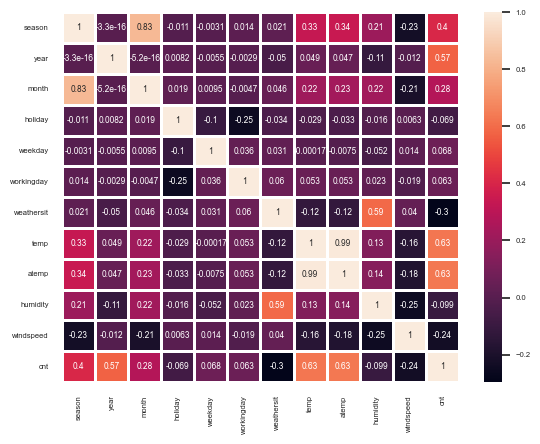

In [13]:
#check the correlation using heatmap
# check the heatmap for the data
sns.set(font_scale=0.5)
sns.heatmap(bikesharing_data.corr(),annot=True,linewidths=.8)
plt.show()

In [14]:
# Map the values for better understanding of data
bikesharing_data.season = bikesharing_data.season.map(({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))
bikesharing_data.month = bikesharing_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikesharing_data.weekday = bikesharing_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikesharing_data.weathersit = bikesharing_data.weathersit.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
bikesharing_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

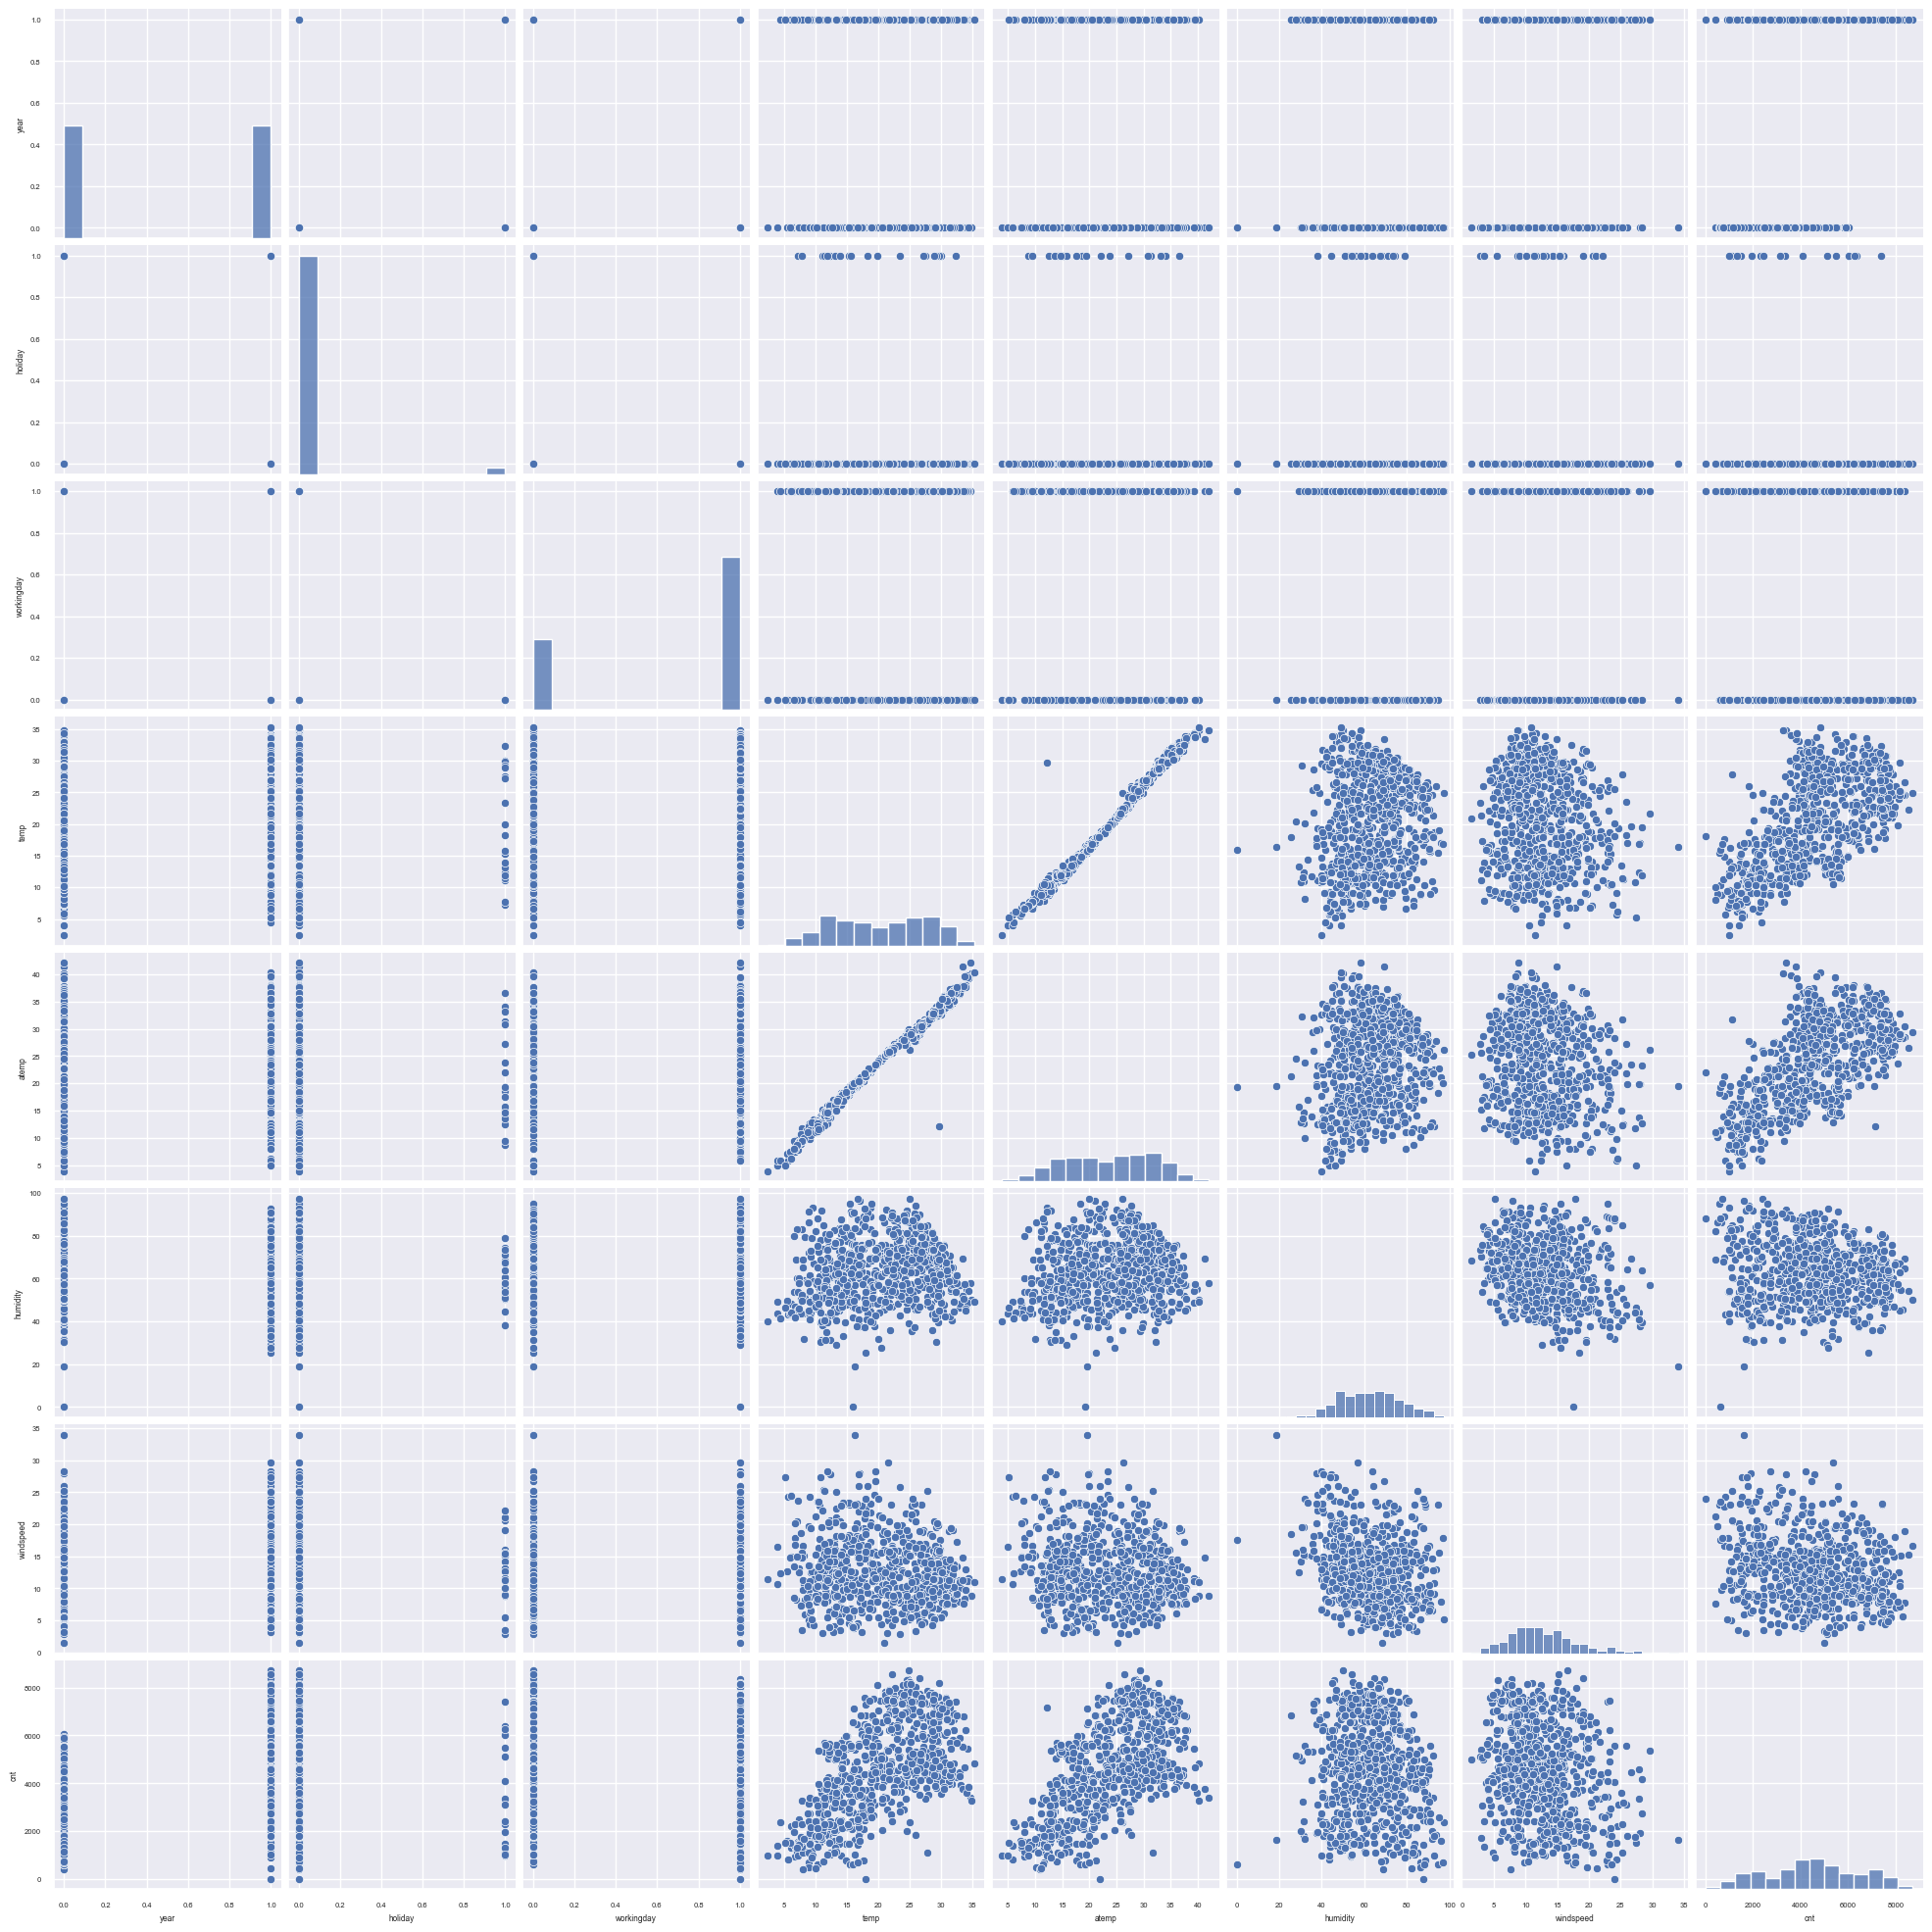

In [15]:
sns.pairplot(bikesharing_data)
plt.show()

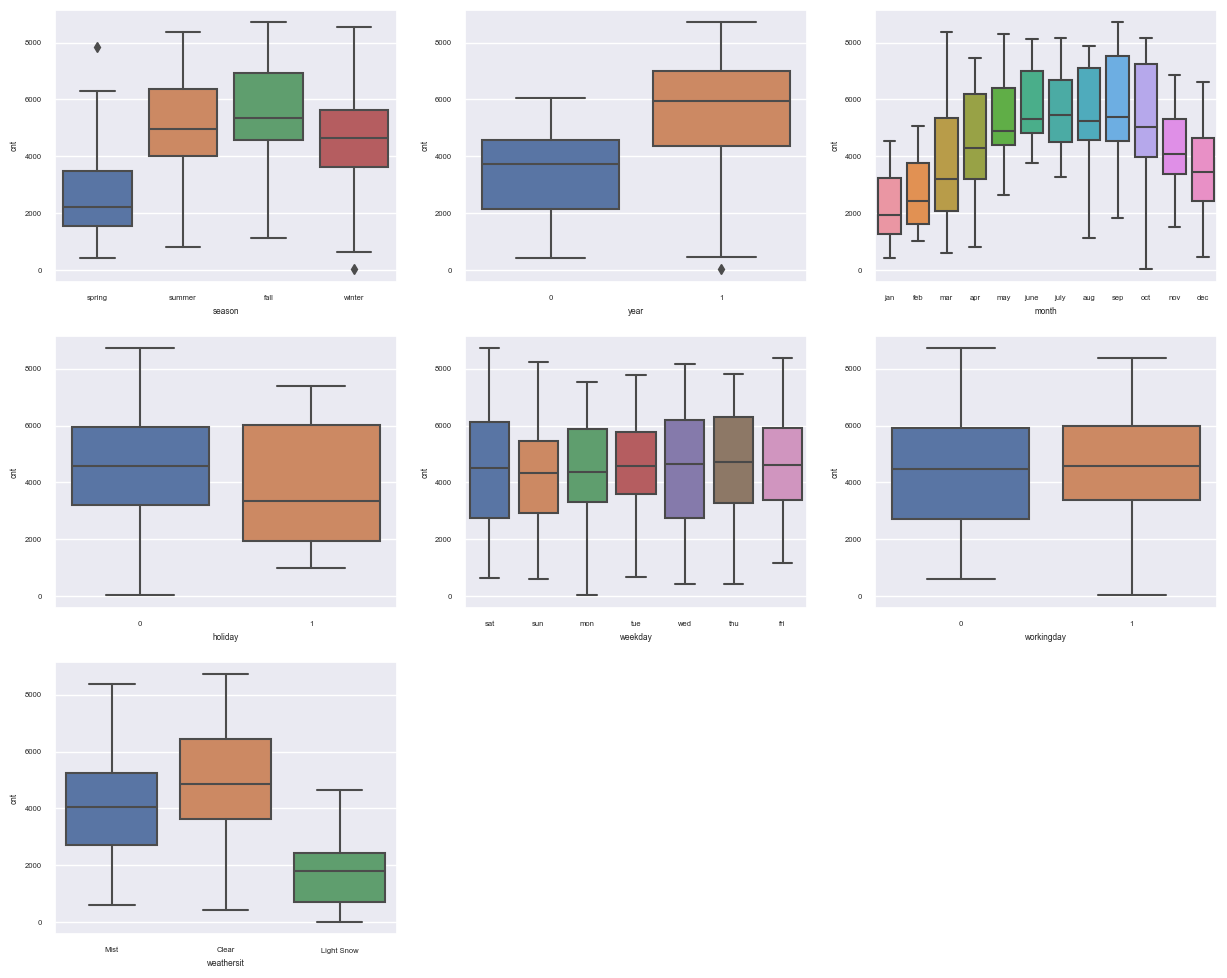

In [16]:
#As there are few categorical variables, we will findout the impact of categorical variables against target variable cnt

# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(10, 12)).set_figwidth(15)

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_data)
plt.show()

We can also visualise some of these categorical features parallely by using the hue argument. 
Below is the plot for season with yr as the hue.

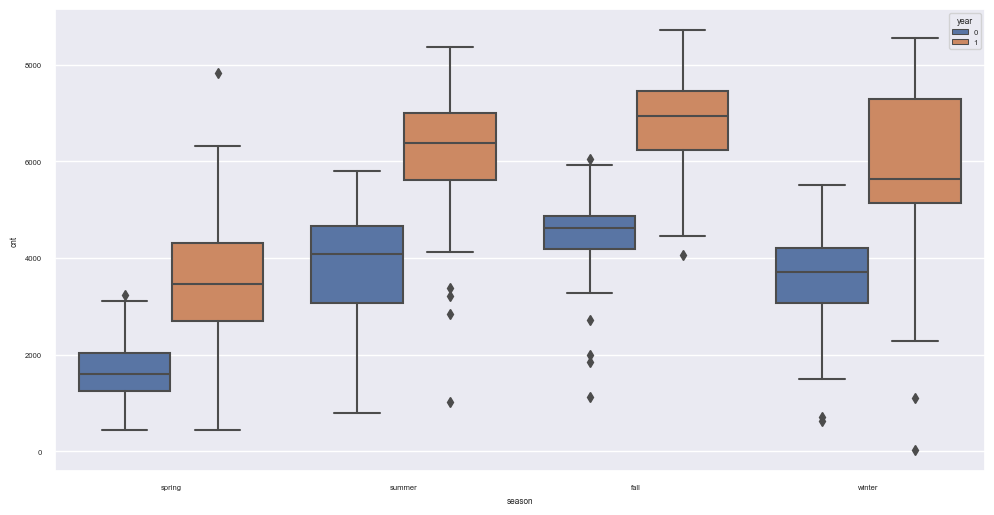

In [17]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'season', y = 'cnt', hue = 'year', data = bikesharing_data)
plt.show()


Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

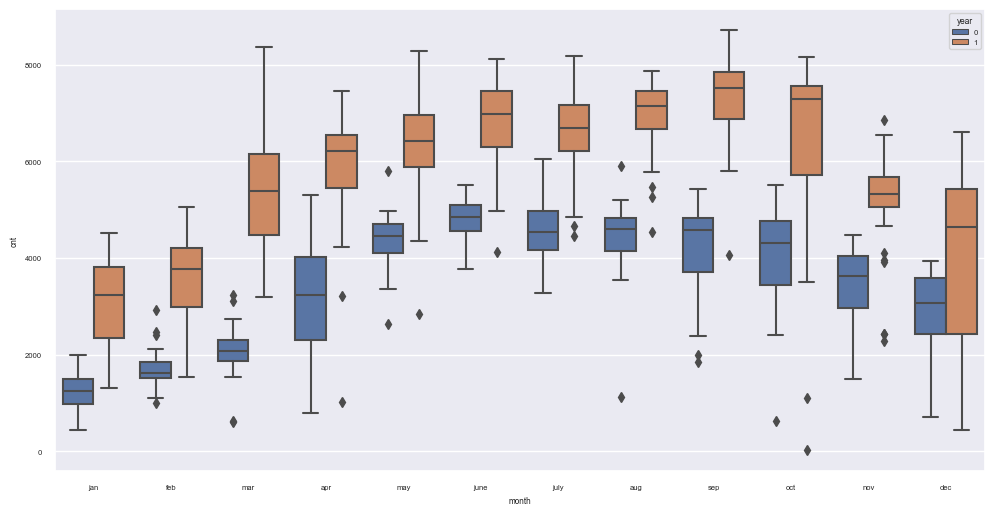

In [18]:
#also plot with respect to month
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'month', y = 'cnt', hue = 'year', data = bikesharing_data)
plt.show()

with the above plot, we can observe that demand in bike bookings increased from 2018 to 2019 and in the months starting from april to october

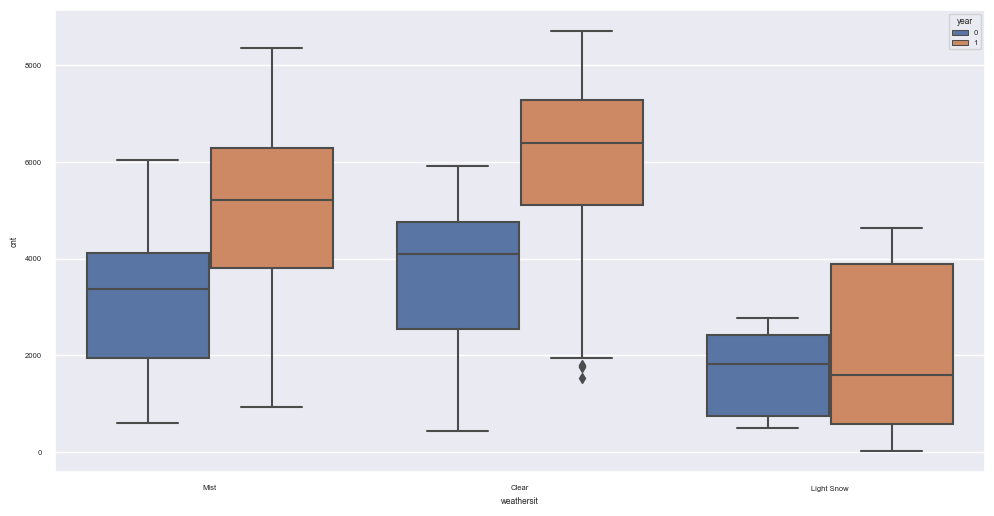

In [19]:
#also plot with respect to month
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'year', data = bikesharing_data)
plt.show()

In case of weathersit, clear has more demand when compared to Mist. as we see in weathersit also when compared from 2018, 2019 has more booking demand

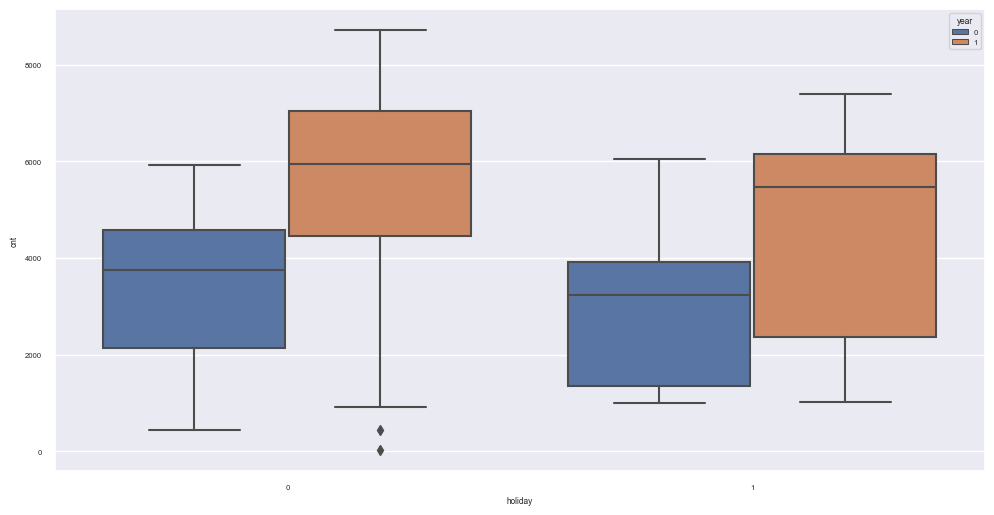

In [20]:
#also plot with respect to month
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'year', data = bikesharing_data)
plt.show()

In case of Holidays in 2019, there is a huge difference when compared to 2018 

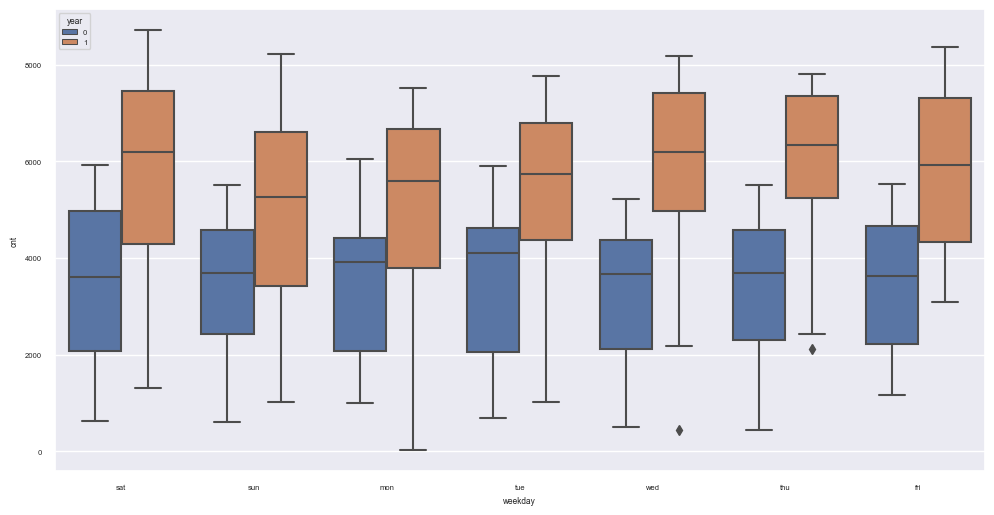

In [21]:
#also plot with respect to month
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'year', data = bikesharing_data)
plt.show()

when compared to 2018, in 2019 there is less demand for booking on sunday, monday and tuesday

### Apart from categorical columns, considering temp,atemp,hum,windspeed,cnt.

lets analyse the climatic conditions affecting target values

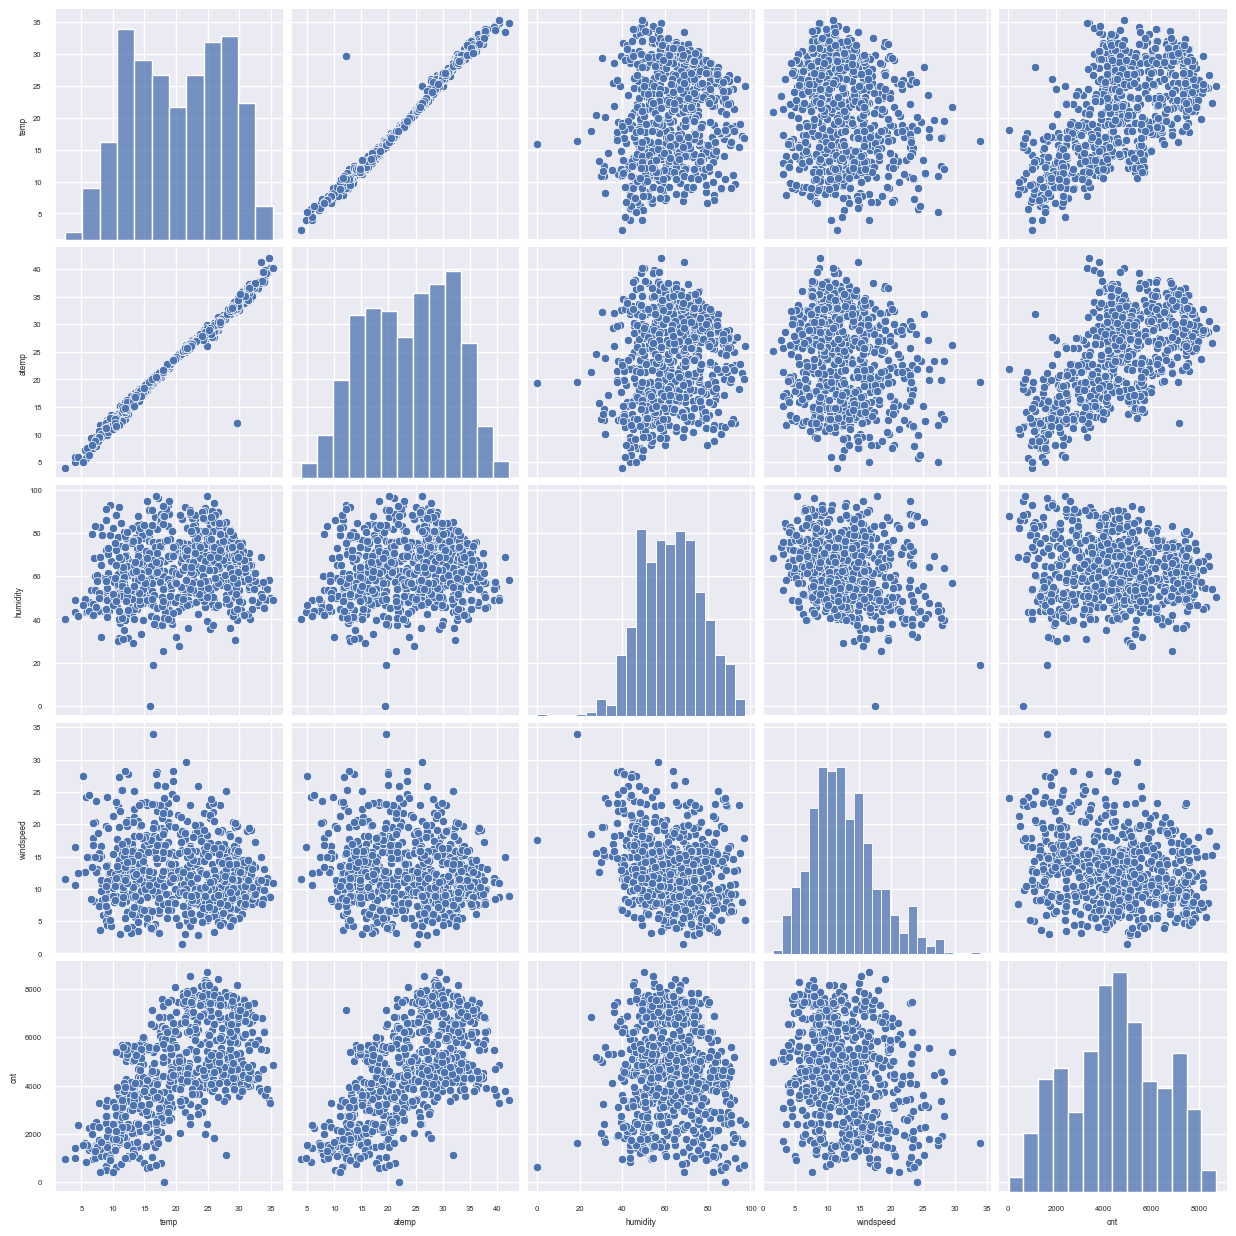

In [22]:
sns.pairplot(data = bikesharing_data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

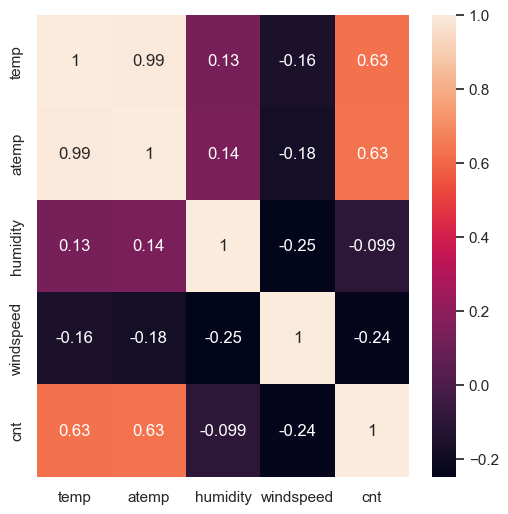

In [23]:
#finding the correlation between the variables
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(bikesharing_data[['temp','atemp','humidity','windspeed','cnt']].corr(),annot=True)
plt.show()

As seen in above heatmap, we can see atemp and temp are highly correlated which means they represent multicollinearity. Hence we cannot consider them in our model. But we will see after checking VIF

## Step 3: Data Preparation


#### Creating Dummy Variables for data having multiple values. Below are the columns
1. Season
2. Mnth
3. Weekday
4. Weathersir

In [24]:
months_df=pd.get_dummies(bikesharing_data.month,drop_first=True)
weekdays_df=pd.get_dummies(bikesharing_data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikesharing_data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikesharing_data.season,drop_first=True)

In [25]:
print(months_df.head())
print(weekdays_df.head())
print(weathersit_df.head())
print(seasons_df.head())

     aug    dec    feb   jan   july   june    mar    may    nov    oct    sep
0  False  False  False  True  False  False  False  False  False  False  False
1  False  False  False  True  False  False  False  False  False  False  False
2  False  False  False  True  False  False  False  False  False  False  False
3  False  False  False  True  False  False  False  False  False  False  False
4  False  False  False  True  False  False  False  False  False  False  False
     mon    sat    sun    thu    tue    wed
0  False   True  False  False  False  False
1  False  False   True  False  False  False
2   True  False  False  False  False  False
3  False  False  False  False   True  False
4  False  False  False  False  False   True
   Light Snow   Mist
0       False   True
1       False   True
2       False  False
3       False  False
4       False  False
   spring  summer  winter
0    True   False   False
1    True   False   False
2    True   False   False
3    True   False   False
4    True   

In [26]:
## Now concatenate the dummies columns with the actual dataframe
bikesharing_data = pd.concat([seasons_df,months_df,weathersit_df,weekdays_df,bikesharing_data],axis=1)

In [27]:
bikesharing_data.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
bikesharing_data.columns

Index(['spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'Light Snow', 'Mist', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt'],
      dtype='object')

In [29]:
# Drop "seasons,months,weathersit,weekdays" columns as we have created the dummies for it

bikesharing_data.drop(['season','month','weathersit','weekday'],axis=1,inplace=True)

In [30]:
bikesharing_data.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,tue,wed,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,True,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bikesharing_data.columns

Index(['spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'Light Snow', 'Mist', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed', 'year', 'holiday', 'workingday',
       'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [32]:
#The first basic step for regression is performing a train-test split.
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
df_train.shape

(510, 30)

In [34]:
df_test.shape

(219, 30)

In [35]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [37]:
df_train.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,tue,wed,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
653,False,False,True,False,False,False,False,False,False,False,...,True,False,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,False,False,False,False,False,False,False,True,False,False,...,True,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,False,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,False,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [38]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can observe the minimum value is 0 and maximum is 1

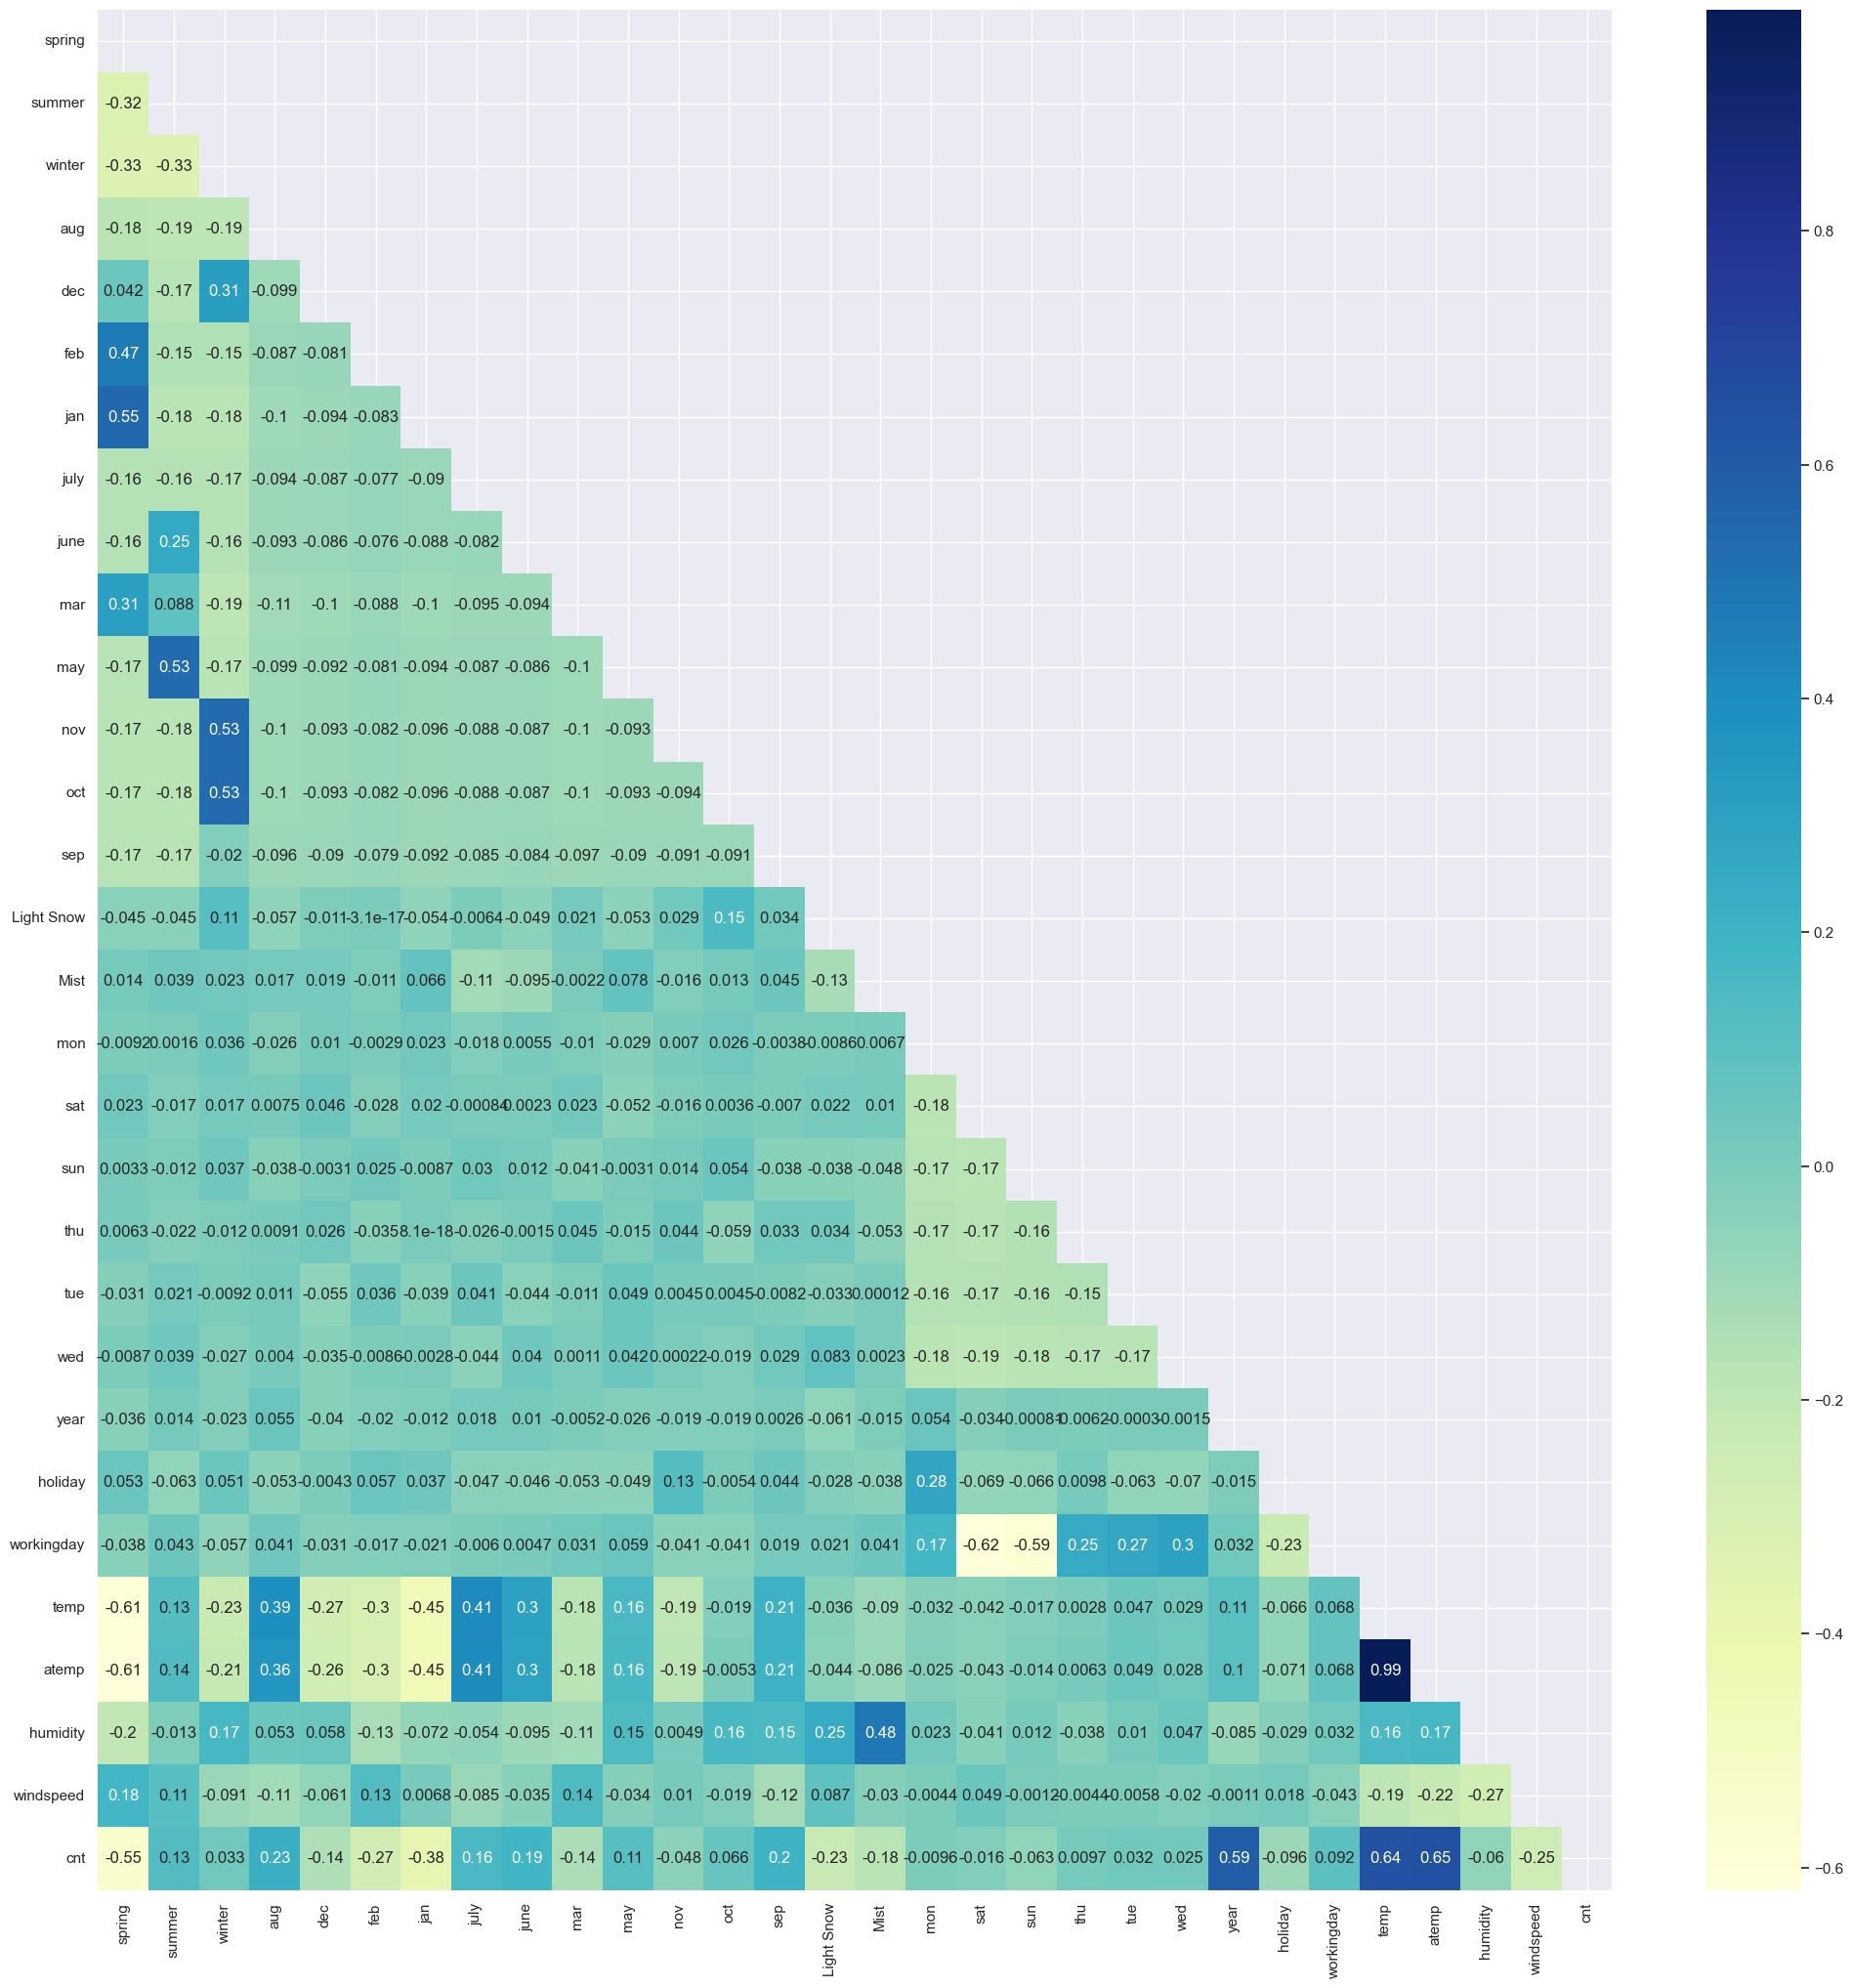

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",mask=matrix)
plt.show()

In the above heatmap, we can observe cnt has correlation between year and temp. similarily Mist and humidity shows correlation, winter shows correlation with oct and nov

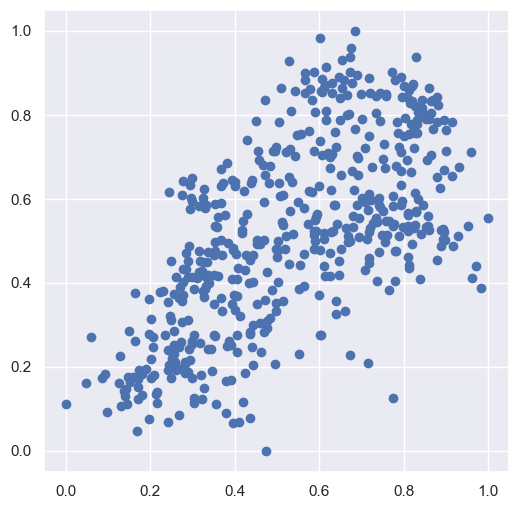

In [40]:
# Our goal is to findout which parameter targets cnt. lets see using scatter map between cnt and temp
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

### Dividing into X and Y sets for the model building

In [41]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE
Recursive feature elimination

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 2),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', False, 4),
 ('oct', False, 11),
 ('sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 15),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [45]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['spring', 'summer', 'winter', 'jan', 'july', 'sep', 'Light Snow',
       'Mist', 'sat', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')


In [46]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]


Index(['aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed', 'atemp'],
      dtype='object')

In [47]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,spring,4.53
2,winter,3.48
1,summer,2.84
7,Mist,2.29
9,year,2.09
8,sat,1.98


VIF shows high for humidity

### Building model using statsmodel, for the detailed statistics

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)
# Building 1st linear regression model
lr_1 = sm.OLS(y_train,X_train_rfe.astype(float)).fit()
print(lr_1.summary())


                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1206.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:25:14   Log-Likelihood:                          496.10
No. Observations:                 510   AIC:                                     -962.2
Df Residuals:                     495   BIC:                                     -898.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,spring,3.08
1,summer,2.33
9,year,2.08
2,winter,1.99
8,sat,1.97
3,jan,1.62
4,july,1.59


In [52]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2.astype(float)).fit()
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.33e-189
Time:                        15:25:14   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [53]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.82
10,workingday,4.68
12,windspeed,4.66
0,spring,2.99
1,summer,2.31
9,year,2.08
2,winter,1.92
8,sat,1.84
3,jan,1.62
4,july,1.59


In [54]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3.astype(float)).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.11e-189
Time:                        15:25:15   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.031      5.294      0.0

we can observe jan has high p-value compared to all others. lets drop the jan value and re build model

In [55]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.65
11,windspeed,4.64
0,spring,2.38
1,summer,2.31
8,year,2.07
2,winter,1.92
7,sat,1.83
3,july,1.58
6,Mist,1.56


In [56]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4.astype(float)).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          3.28e-189
Time:                        15:25:17   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

For now we can observe variables with less p-value.

In [57]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.48
8,workingday,4.65
10,windspeed,4.63
0,spring,2.30
7,year,2.07
1,summer,1.99
6,sat,1.83
2,winter,1.77
5,Mist,1.56
3,sep,1.23


In [58]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5.astype(float)).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          6.86e-189
Time:                        15:25:19   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.031      4.599      0.0

In [59]:
# Dropping variable workingday due to its high VIF value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.61
8,temp,3.87
7,year,2.07
0,spring,1.99
1,summer,1.89
2,winter,1.63
5,Mist,1.54
3,sep,1.22
6,sat,1.18
4,Light Snow,1.08


In [60]:

# Building 6th linear regression model
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6.astype(float)).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          8.99e-185
Time:                        15:25:20   Log-Likelihood:                 490.23
No. Observations:                 510   AIC:                            -958.5
Df Residuals:                     499   BIC:                            -911.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1852      0.030      6.187      0.0

In [61]:
# Dropping variable temp due to its high VIF value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,windspeed,4.59
7,temp,3.84
6,year,2.07
0,spring,1.98
1,summer,1.89
2,winter,1.62
5,Mist,1.54
3,sep,1.22
4,Light Snow,1.08


In [62]:
# Building 7th linear regression model
# 
X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7.astype(float)).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          3.55e-185
Time:                        15:25:21   Log-Likelihood:                 488.29
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     500   BIC:                            -914.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1891      0.030      6.315      0.0

We can consider the above model i.e lr_7, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 268.6 (which is greater than 1) and the p-value of 3.55e-185 i.e almost equals to zero, states that the overall model is significant.

## Step 6: Residual Analysis of the train data and validation

In [63]:
X_train_lm_7

,const,spring,summer,winter,sep,Light Snow,Mist,year,temp,windspeed
653,1.0,False,False,True,False,False,False,1,0.509887,0.300794
576,1.0,False,False,False,False,False,False,1,0.815169,0.264686
426,1.0,True,False,False,False,False,True,1,0.442393,0.255342
728,1.0,True,False,False,False,False,False,1,0.245101,0.663106
482,1.0,False,True,False,False,False,True,1,0.395666,0.188475
...,...,...,...,...,...,...,...,...,...,...
526,1.0,False,True,False,False,False,True,1,0.824514,0.355596
578,1.0,False,False,False,False,False,False,1,0.863973,0.187140
53,1.0,True,False,False,False,False,False,0,0.202618,0.111379
350,1.0,False,False,True,False,False,True,0,0.248216,0.431816


In [64]:
y_train_pred = lr_7.predict(X_train_lm_7)

Normality of error terms

Text(0.5, 0, 'Errors')

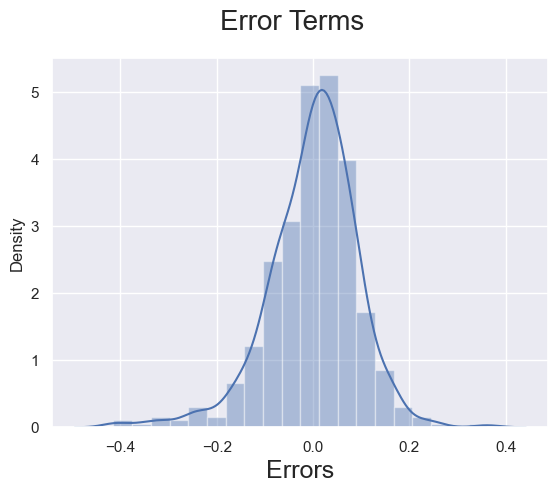

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

### Multi Colinearity

In [66]:
# Run the function to calculate VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,windspeed,4.59
7,temp,3.84
6,year,2.07
0,spring,1.98
1,summer,1.89
2,winter,1.62
5,Mist,1.54
3,sep,1.22
4,Light Snow,1.08


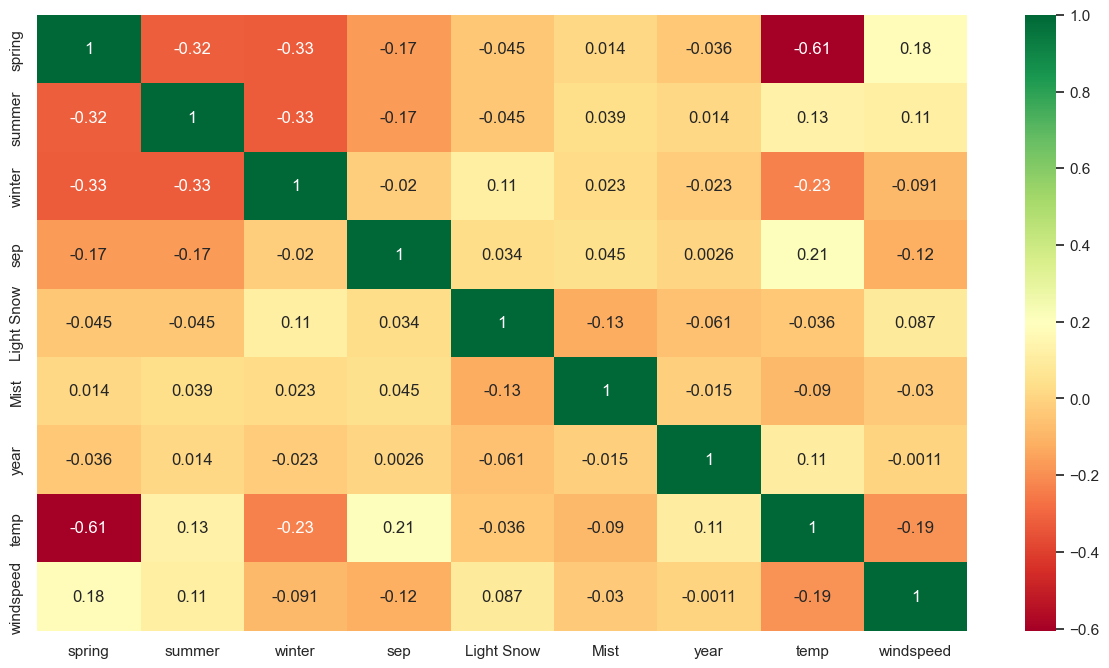

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

There is no multicolinearity as seen from the heatmap

### Linearity

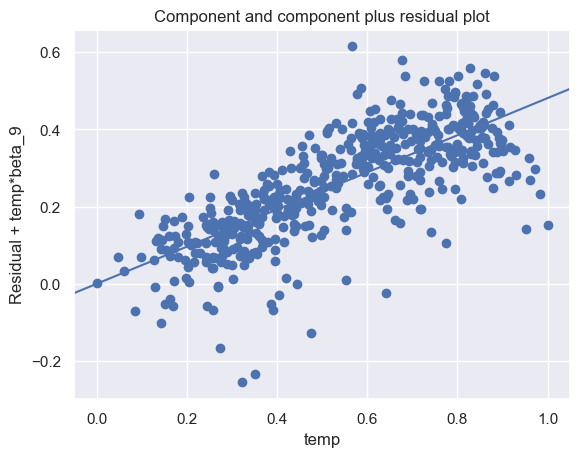

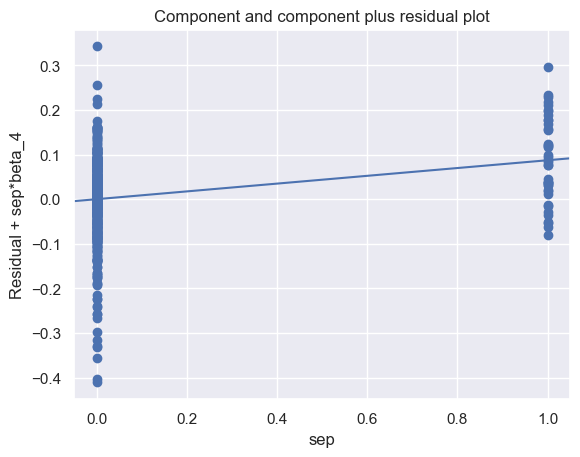

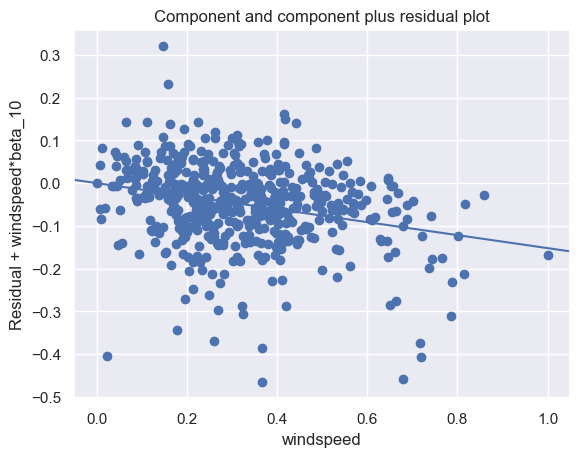

In [68]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 7th model.

In [69]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,tue,wed,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
184,False,False,False,False,False,False,False,True,False,False,...,False,False,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,False,True,False,False,False,False,False,False,True,False,...,False,True,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,False,False,True,False,False,False,False,False,False,False,...,False,False,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,False,False,False,True,False,False,False,False,False,False,...,False,True,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,False,True,False,False,False,False,False,False,True,False,...,False,False,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [70]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [71]:
#pop out cnt from test data
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)

In [73]:
y_pred = lr_7.predict(X_test_lm_7)


In [74]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8009

## Model Evaluation

Text(0, 0.5, 'y_pred')

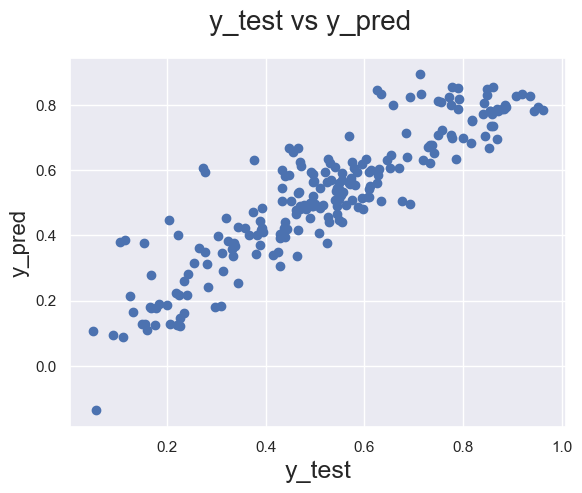

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [76]:
round(lr_7.params,4)

const         0.1891
spring       -0.0577
summer        0.0611
winter        0.0931
sep           0.0872
Light Snow   -0.2819
Mist         -0.0785
year          0.2344
temp          0.4794
windspeed    -0.1498
dtype: float64

We can see that the equation of our best fitted line is:

#### cnt = 0.1891 - 0.0577 * spring + 0.0611 * summer + 0.0931 * winter + 0.0872 * sep - 0.2819 * Light_Snow -0.0785 * Mist + 0.2344 * year +  0.4794 * temp - 0.1498 * windspeed

In [77]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7923


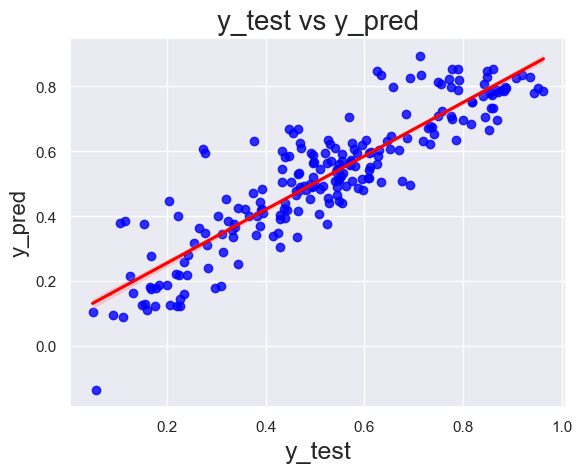

In [78]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred.astype(float), ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

##                     Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.829
- Test dataset R^2           : 0.8009
- Train dataset Adjusted R^2 : 0.826    
- Test dataset Adjusted R^2  : 0.7923


### Demand of bikes depend on spring, summer, winter, sep, Light Snow, Mist, year, temp and windspeed